   _id           Timestamp  Redemption Count  Sales Count
0    1 2025-10-30 21:45:00                 0            1
1    2 2025-10-30 21:30:00                 6            3
2    3 2025-10-30 21:00:00                 2            1
3    4 2025-10-30 20:45:00                 1            1
4    5 2025-10-30 20:30:00                16            5


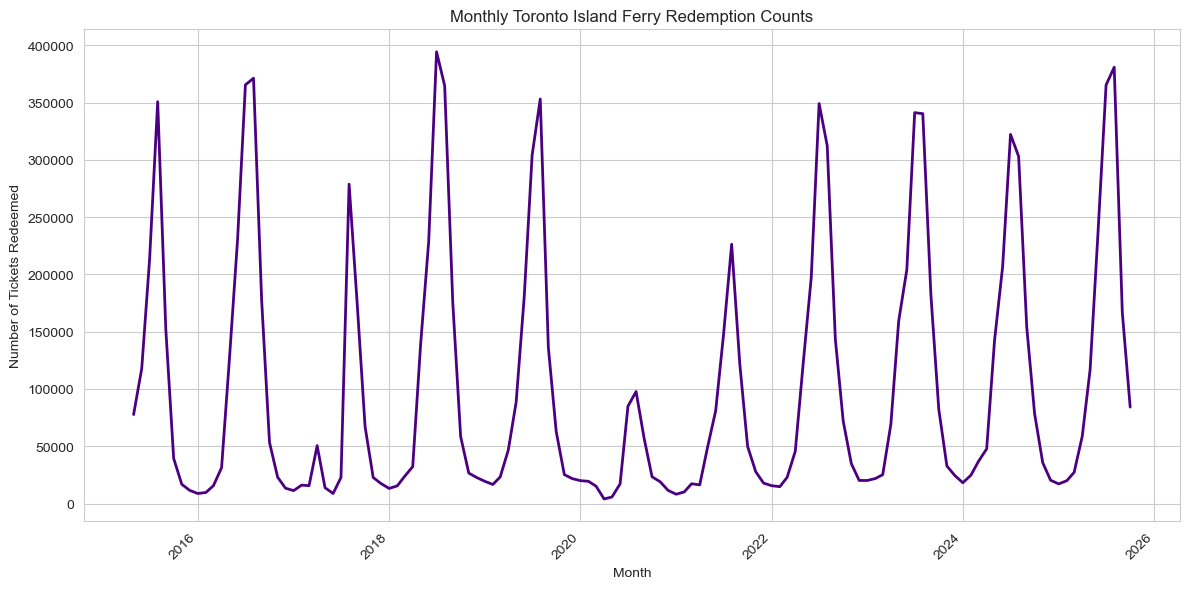

In [1]:
# Import necessary libraries
import pandas as pd          # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns        # For advanced plotting
import os                    # To work with directories

# Setting working directory to where CSV file is located
os.chdir(r'C:\Users\Sanyam\shell_github\visualization\02_activities\assignments\assignment-3')

# Loading the CSV file and parse 'Timestamp' column as datetime
csv_file = 'Toronto Island Ferry Ticket Counts.csv'
df = pd.read_csv(csv_file, parse_dates=['Timestamp'])

# Preview the first 5 rows to check if data loaded correctly
print(df.head())

# Aggregate data by month
# Convert 'Timestamp' to monthly periods
df['Month'] = df['Timestamp'].dt.to_period('M')

# Grouping by month and suming the 'Redemption Count' for each month
monthly = df.groupby('Month')['Redemption Count'].sum().reset_index()

# Converting the 'Month' column back to a timestamp for plotting
monthly['Month'] = monthly['Month'].dt.to_timestamp()

# Setting seaborn plot style
sns.set_style('whitegrid')

# Creating figure with specified size
plt.figure(figsize=(12,6))

# Ploting a line chart of monthly redemption counts
sns.lineplot(data=monthly, x='Month', y='Redemption Count', color='indigo', linewidth=2)

# Adding title and labels
plt.title('Monthly Toronto Island Ferry Redemption Counts')
plt.xlabel('Month')
plt.ylabel('Number of Tickets Redeemed')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjusting layout to avoid overlapping labels
plt.tight_layout()

# Saving the figure as a PNG file
plt.savefig('viz1_ferry_ticket_trend.png', dpi=300)

# Show the plot
plt.show()
